## Temporal Demand Patterns and Seasonality

In order to gain information on the operational performance of the bicycle fleet, we plot in this notebook how fleet usage varies depending on the weekday, on the hour of the day, on the month, on holidays, on precipitation and on peak temperature.

In [22]:
#import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#import cleaned dataset
trips_hourly_engineered = pd.read_pickle('../00_data/trips_hourly_engineered.pkl')

### Weekday

In [24]:
#create column for total of starting and ongoing trips per hour
trips_hourly_engineered["ongoing_trips_total"] = trips_hourly_engineered["starting_trips"] + trips_hourly_engineered["ongoing_trips_prev"]

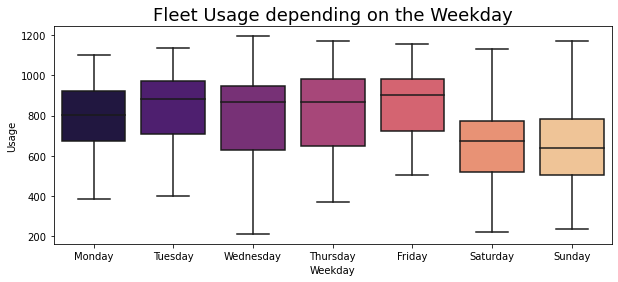

In [25]:
#group by weekday and plot

weekday=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

trips_hourly_engineered_weekday = trips_hourly_engineered.groupby(["day_of_year","day_of_week"])["ongoing_trips_total"].sum()
trips_hourly_engineered_weekday = pd.DataFrame(trips_hourly_engineered_weekday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_weekday.index.get_level_values(1), y=trips_hourly_engineered_weekday["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Weekday", fontsize=18, fontname="Arial")
ax.set_xlabel("Weekday")
ax.set_ylabel("Usage")
ax.set_xticklabels(weekday)
plt.show()
#ax.figure.savefig("Weekday_Usage.png")

As visible in the plot, there is an increased demand during the working week with trip numbers dropping over the weekend. In between both the working days and the days of the weekend there is only little variance. 

### Hour

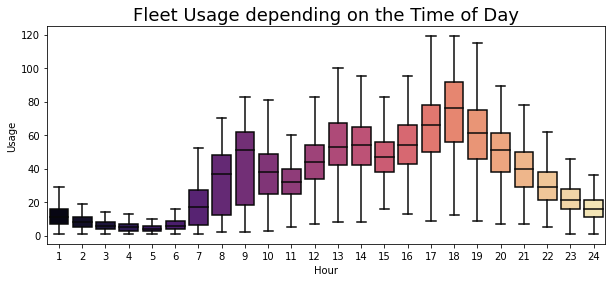

In [26]:
#group by hour and plot
time = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
trips_hourly_engineered_hour = trips_hourly_engineered.groupby(["day_of_year","hour"])["ongoing_trips_total"].sum()
trips_hourly_engineered_hour = pd.DataFrame(trips_hourly_engineered_hour)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_hour.index.get_level_values(1), y=trips_hourly_engineered_hour["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Time of Day", fontsize=18, fontname="Arial")
ax.set_xlabel("Hour")
ax.set_ylabel("Usage")
ax.set_xticklabels(time)
plt.show()
#ax.figure.savefig("Time_Usage.png")

The data shows that demand peaks in the afternoon at around 6 pm. In general, demand seem to be low during the night and higher during the day, specifically during morning and evening rush hour a. This could indicate that the bicycles are often used to get to work and even more so to get home from work. 

### Month

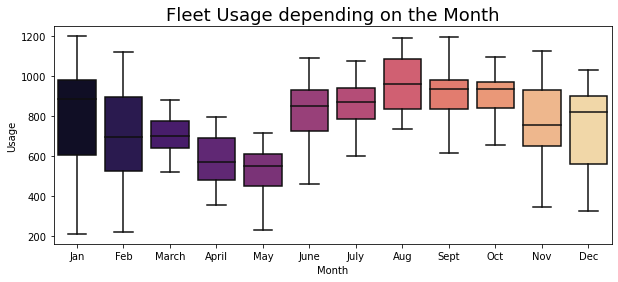

In [27]:
#group by month and plot
months = ["Jan", "Feb", "March", "April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
trips_hourly_engineered_month = trips_hourly_engineered.groupby(["day_of_year","month"])["ongoing_trips_total"].sum()
trips_hourly_engineered_month = pd.DataFrame(trips_hourly_engineered_month)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_month.index.get_level_values(1), y=trips_hourly_engineered_month["ongoing_trips_total"],ax=ax, palette="magma", showfliers=False)
ax.set_title("Fleet Usage depending on the Month", fontsize=18, fontname="Arial")
ax.set_xlabel("Month")
ax.set_ylabel("Usage")
ax.set_xticklabels(months)
plt.show()
#ax.figure.savefig("Month_Usage.png")

We can observe high demand during the summer months with a peak in August. Surprisingly, the lowest demand does not occur in winter when the temperature may be lower but in May. This could be due to the fact that temperatures in Los Angeles are comparatively high even during the winter, thus it may not affect the demand as much. Instead, the drop in april and may may be connected to other factors such as rain. 

### Holidays

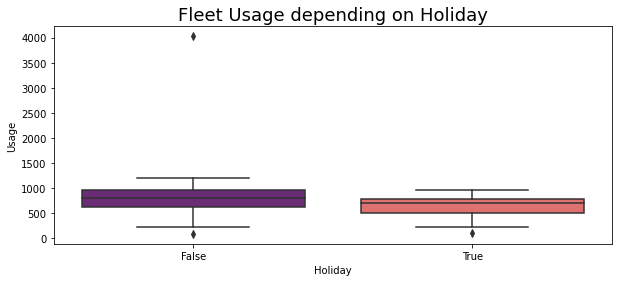

In [28]:
#group by holiday and plot
trips_hourly_engineered_holiday = trips_hourly_engineered.groupby(["day_of_year","is_holiday"])["ongoing_trips_total"].sum()
trips_hourly_engineered_holiday = pd.DataFrame(trips_hourly_engineered_holiday)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_holiday.index.get_level_values(1), y=trips_hourly_engineered_holiday["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("Fleet Usage depending on Holiday", fontsize=18, fontname="Arial")
ax.set_xlabel("Holiday")
ax.set_ylabel("Usage")
plt.show()
#ax.figure.savefig("Holiday_Usage.png")

The plot shows are clear distinction in demand between holidays and regulatal days. This supports the hypothesis that the bicycles are frequently used as transportation to and from work which is not neccessary on holidays. 

### Precipitation

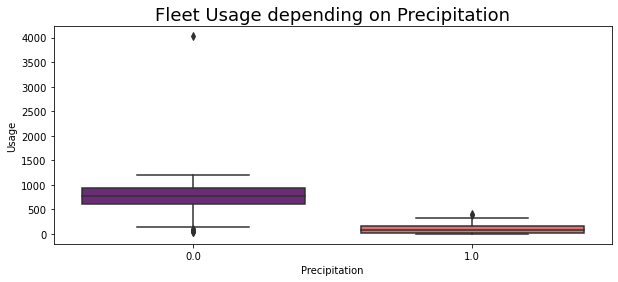

In [29]:
#group by precipitation and plot
trips_hourly_engineered_precip = trips_hourly_engineered.groupby(["day_of_year","precip"])["ongoing_trips_total"].sum()
trips_hourly_engineered_precip = pd.DataFrame(trips_hourly_engineered_precip)

fig,ax = plt.subplots(figsize=(10,4)) 

sns.boxplot(x=trips_hourly_engineered_precip.index.get_level_values(1), y=trips_hourly_engineered_precip["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("Fleet Usage depending on Precipitation", fontsize=18, fontname="Arial")
ax.set_xlabel("Precipitation")
ax.set_ylabel("Usage")
plt.show()
#ax.figure.savefig("Preciptiation_Usage.png")

We can observe a much higher demand on days with no rain. This matches our intuition that riding a bicycle is more appealing on a day with no precipitation thus leading to fewer trips on days with rain. 

### Temperature

In [30]:
#round peak temperatures
trips_hourly_engineered_temp = trips_hourly_engineered
trips_hourly_engineered_temp["max_temp"]= trips_hourly_engineered_temp["max_temp"].round()
trips_hourly_engineered_temp.head(2)

,starting_trips,ongoing_trips_prev,in_service_bikes_rolling,available_bikes,max_temp,min_temp,precip,hour,day_of_week,month,day_of_year,week,is_weekday,is_holiday,ongoing_trips_total
index,,,,,,,,,,,,,,,
2019-01-01 01:00:00,8.0,2.0,872.0,870.0,16.0,15.6,0.0,1,1,1,1,1,True,True,10.0
2019-01-01 02:00:00,11.0,4.0,872.0,868.0,15.0,15.0,0.0,2,1,1,1,1,True,True,15.0


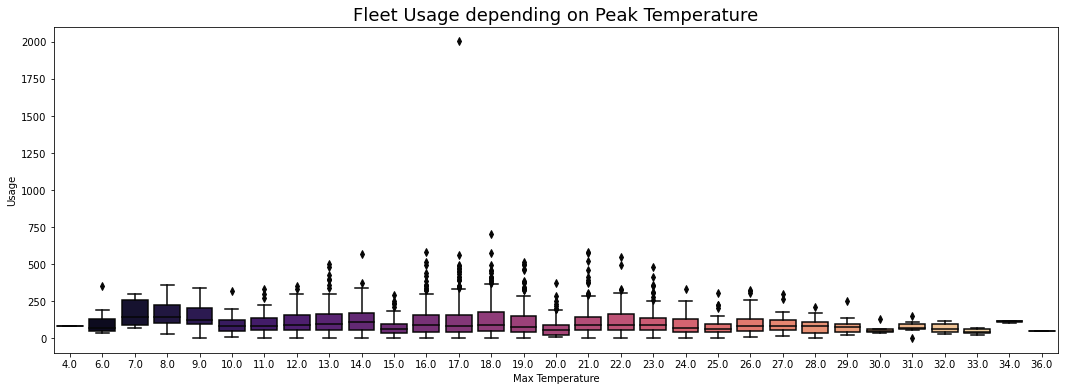

In [31]:
#group by peak temperature and plot
trips_hourly_engineered_temp = trips_hourly_engineered_temp.groupby(["day_of_year","max_temp"])["ongoing_trips_total"].sum()
trips_hourly_engineered_temp = pd.DataFrame(trips_hourly_engineered_temp)

fig,ax = plt.subplots(figsize=(18,6)) 

sns.boxplot(x=trips_hourly_engineered_temp.index.get_level_values(1), y=trips_hourly_engineered_temp["ongoing_trips_total"],ax=ax, palette="magma")
ax.set_title("Fleet Usage depending on Peak Temperature", fontsize=18, fontname="Arial")
ax.set_xlabel("Max Temperature")
ax.set_ylabel("Usage")
plt.show()
#ax.figure.savefig("Temperature_Usage.png")

The graph shows higher demand intervals on days with medium temperatures that are neither too hot or too cold to comfortably ride a bicycle. In general, however, the differences are less obvious than in some of the other plots discussed previously. 